<a href="https://colab.research.google.com/github/oatthegreat/quiz3/blob/main/yudava_roopnarine_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction


<h1>Introduction</h1>
<p>The problems that I see in the data set is there is many nulls. The approach i will take to solve this is to replace the nulls with a feature scaling method for the purposes of preparing them for use within a machine learning algorithm.I will use various functions like .replace() .transform() .unique() MinMaxScaler() and etc. . I will use imports to futhure my understanding f the data to help me fix the problem.</p>




#Data


<p>The integrety of the data set is not good there is allot of missing data for some of the attributes regarding wine like Residual Sugar, Chlorides, Free Sulfur Dioxide, TotalSulfurDioxide, pH,Sulphates and Alcohol.As it is now the data cannot be used due to having many gaps. </p>



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#retrieving my data
df = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv')

#replacing ? with NAN
df.replace('?', np.nan, inplace = True)

#printing the data
print(df.shape)
print(df.head())

(12795, 16)
   INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160       -0.98           54.2   
1      2       3           4.5            0.160       -0.81           26.1   
2      4       5           7.1            2.640       -0.88           14.8   
3      5       3           5.7            0.385        0.04           18.8   
4      6       4           8.0            0.330       -1.26            9.4   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  \
0     -0.567                NaN               268.0  0.99280  3.33      -0.59   
1     -0.425               15.0              -327.0  1.02792  3.38       0.70   
2      0.037              214.0               142.0  0.99518  3.12       0.48   
3     -0.425               22.0               115.0  0.99640  2.24       1.83   
4        NaN             -167.0               108.0  0.99457  3.12       1.77   

   Alcohol  LabelAppeal  AcidInd

In [67]:
#checking if its null
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

#Exploratory Data Analysis

<h1>EDA</h1>

<ol>
  <h3>Attributes in wine</h3>

  <li>TARGET or Response Variable is the number of sample cases of wine that were purchased by wine distribution companies after sampling a wine</li>

  <li>Fixed Acidity in wine is when most acids involved with wine that are fixed do not evaporate readily</li>

  <li>Citric Acid in wine is found in a small quantity it adds freshness and flavor to wines</li>

  <li>Residual Sugar is the amount of sugar remaining after fermentation stops where tanges from less than 1 gram and wines with greater than 45 grams are sweet</li>

  <li>Chlorides the amount of salt in wine</li>

  <li>Free Sulfur Dioxide is what prevents microbial growth and the oxidation of wine</li>

  <li>Total Sulfur Dioxide what helps the wine become noticible when smelling and tasting the wine</li>

  <li>Density is the density of water that is close to that of water depending on the alcohol and sugar content</li>

  <li>PH is what describes how acidic or basic a wine is on a scale from 0 to 14 (acidic-basic)</li>

  <li>Sulphates is something that acts as an antimicrobial and antioxidant for the wine</li>

  <li>Alcohol is the percent of alcohol in wine</li>

  <li>Label Appeal is when there is important and useful facts about the wine </li>

  <li>Acid Index is the measure of potassium hydroxide that is required to neutralize the free fatty acid contained in unit mass of a chemical substance</li>
  
  <li>STARS is the stabilization of tartrates in wine</li>
                                  
</ol>

In [ ]:
#INDEX
plt.boxplot(df[df["INDEX"].notnull()].INDEX)

<p>This shows the range of the index from 0 - 16000</p>

In [ ]:
#TARGET  
plt.boxplot(df[df["TARGET"].notnull()].TARGET)

<p>This shows the range of the Target from 0 - 8</p>

In [ ]:
#FixedAcidity    
plt.boxplot(df[df["FixedAcidity"].notnull()].FixedAcidity)

<p>This shows the range of the Fixed Acidity from -20 - 30</p>

In [ ]:
#VolatileAcidity      
plt.boxplot(df[df["VolatileAcidity"].notnull()].VolatileAcidity)

<p>This shows the range of the Volatile Acidity from -3 - 4</p>

In [ ]:
#CitricAcid      
plt.boxplot(df[df["CitricAcid"].notnull()].CitricAcid)

<p>This shows the range of the Citric Acid from -3 - 4</p>

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bd8c2f450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bd8c35490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bd8c3c4d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bd8c35f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bd8c2f9d0>,
  <matplotlib.lines.Line2D at 0x7f5bd8c2ff10>]}

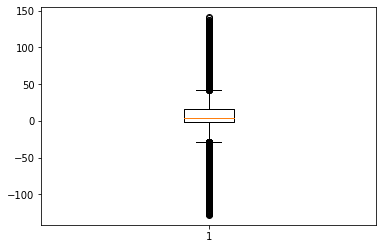

In [42]:
#ResidualSugar      
plt.boxplot(df[df["ResidualSugar"].notnull()].ResidualSugar)

<p>This shows the range of the Residual Sugar from -100 - 150</p>

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bd8b82fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bd8b93050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bd8b9a090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bd8b93b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bd8b89590>,
  <matplotlib.lines.Line2D at 0x7f5bd8b89ad0>]}

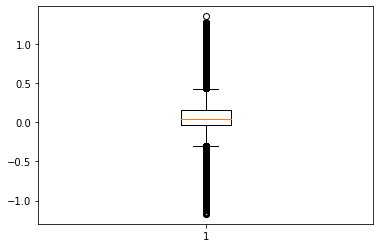

In [44]:
#Chlorides      
plt.boxplot(df[df["Chlorides"].notnull()].Chlorides)

<p>This shows the range of the Chloridess from -1.0 - 1.0</p>

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bd8931d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bd8937d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bd893cdd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bd893c890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bd8937310>,
  <matplotlib.lines.Line2D at 0x7f5bd8937850>]}

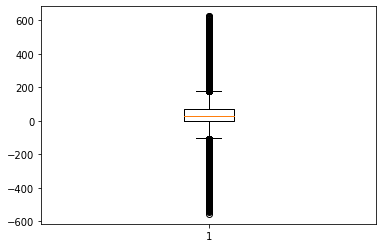

In [50]:
#FreeSulfurDioxide      
plt.boxplot(df[df["FreeSulfurDioxide"].notnull()].FreeSulfurDioxide)

<p>This shows the range of the index Free Sulfur Dioxide -600 - 600</p>

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bd850e650>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bd8515690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bd849d6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bd849d190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bd850ebd0>,
  <matplotlib.lines.Line2D at 0x7f5bd8515150>]}

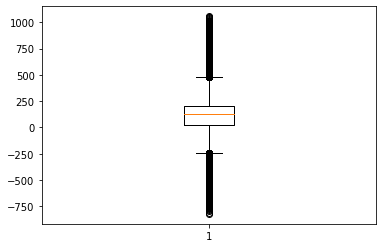

In [60]:
#TotalSulfurDioxide      
plt.boxplot(df[df["TotalSulfurDioxide"].notnull()].TotalSulfurDioxide)

<p>This shows the range of the index from -750 - 1000</p>

In [ ]:
#Density        
plt.boxplot(df[df["Density"].notnull()].Density)

<p>This shows the range of the Density from 0.90 - 1.10</p>

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bd8478f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bd8482f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bd8489f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bd8489a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bd84824d0>,
  <matplotlib.lines.Line2D at 0x7f5bd8482a10>]}

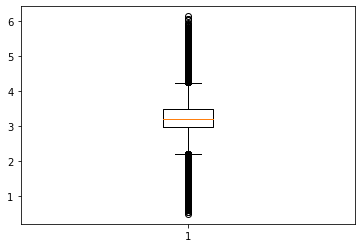

In [61]:
#pH      
plt.boxplot(df[df["pH"].notnull()].pH)

<p>This shows the range of the Ph from 1 - 6</p>

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bd91f2490>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bd8c601d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bd8c89ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bd8c899d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bd902f250>,
  <matplotlib.lines.Line2D at 0x7f5bd8db0ed0>]}

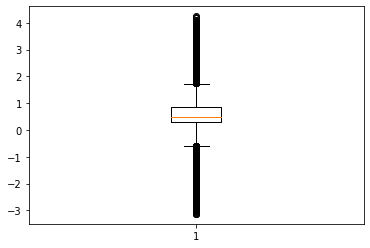

In [62]:
#Sulphates      
plt.boxplot(df[df["Sulphates"].notnull()].Sulphates)

<p>This shows the range of the Sulphates from -3 - 4</p>

{'boxes': [<matplotlib.lines.Line2D at 0x7f5bd8a16590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5bd8a0ef90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bd8976150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bd89d4510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bd8a16c50>,
  <matplotlib.lines.Line2D at 0x7f5bd8b9a350>]}

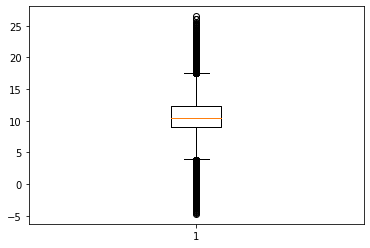

In [63]:
#Alcohol      
plt.boxplot(df[df["Alcohol"].notnull()].Alcohol)

<p>This shows the range of the Alchocal from -5 - 25</p>

In [ ]:
#LabelAppeal      
plt.boxplot(df[df["LabelAppeal"].notnull()].LabelAppeal)

<p>This shows the range of the Label Appeal from -2.0 - 2.0</p>

In [ ]:
#AcidIndex        
plt.boxplot(df[df["AcidIndex"].notnull()].AcidIndex)

<p>This shows the range of the Acid Index from 4 - 16</p>

In [ ]:
#STARS      
plt.boxplot(df[df["STARS"].notnull()].STARS)

<p>This shows the range of STars from 1.0 - 4.0</p>

# Data Preparation

<p>For this I used. isnull().sum() to give me the values that a null then i used .fillna to fill in my nan data points to fix the integrety i used bfill which filled in the values that a previous</p>

In [66]:
#check which values are null so do the data cleaning
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [ ]:
#then change all null values to better fit your data for your data integrety 
df_fill1 = df.copy()
df_fill1.fillna(method='bfill', inplace=True)
print(df_fill1)

# Prepped Data Review

<p>This is the new graphs using our new data and from what i can see not much has changes if anything very sligtly but our data is more appriate now</p>

In [ ]:
#Run ResidualSugar with new data
plt.boxplot(df[df["ResidualSugar"].notnull()].ResidualSugar)

In [ ]:
#Run Chlorides with new data
plt.boxplot(df[df["Chlorides"].notnull()].Chlorides)

In [ ]:
#Run FreeSulfurDioxide with new data
plt.boxplot(df[df["FreeSulfurDioxide"].notnull()].FreeSulfurDioxide)

In [ ]:
#Run TotalSulfurDioxide with new data
plt.boxplot(df[df["TotalSulfurDioxide"].notnull()].TotalSulfurDioxide)

In [ ]:
#Run pH with new data
plt.boxplot(df[df["pH"].notnull()].pH)

In [ ]:
#Run Sulphates with new data
plt.boxplot(df[df["Sulphates"].notnull()].Sulphates)

In [ ]:
#Run Alcohol with new data
plt.boxplot(df[df["Alcohol"].notnull()].Alcohol)

In [ ]:
#Run STARS with new data
plt.boxplot(df[df["STARS"].notnull()].STARS)

# Conclusion

<p>In conclusion, there was not allot of changes with the data even with the large gaps. We used. fill to fill in the gaps which helped with our data to be more percise.We used our domain knowledge to familirze our selves with the data to understand our data.</p>

<p></p>